In [295]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

In [296]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [298]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
import time
from datetime import datetime
import math
from statistics import median

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#Loading the dataset and looking at the data types in the dataset
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Mojo_budget_update.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3243 entries, 0 to 3242
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3243 non-null   object 
 1   title            3243 non-null   object 
 2   year             3243 non-null   int64  
 3   trivia           3243 non-null   object 
 4   mpaa             3082 non-null   object 
 5   release_date     3242 non-null   object 
 6   run_time         3243 non-null   object 
 7   distributor      3228 non-null   object 
 8   director         3243 non-null   object 
 9   writer           3234 non-null   object 
 10  producer         3230 non-null   object 
 11  composer         3138 non-null   object 
 12  cinematographer  3129 non-null   object 
 13  main_actor_1     3243 non-null   object 
 14  main_actor_2     3243 non-null   object 
 15  main_actor_3     3243 non-null   object 
 16  main_actor_4     3240 non-null   object 
 17  budget        

In [299]:
#Looking at the first 3 rows of the dataset
movies.head(3)

,movie_id,title,year,trivia,mpaa,release_date,run_time,distributor,director,writer,producer,composer,cinematographer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4,html
0,tt0099088,Back to the Future Part III,1990,"Stranded in 1955, Marty McFly learns about the...",NaN,May 25,1 hr 58 min,Universal Pictures,Robert Zemeckis,Robert Zemeckis,Neil Canton,Alan Silvestri,Dean Cundey,Michael J. Fox,Christopher Lloyd,Mary Steenburgen,Thomas F. Wilson,40000000.0,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western,https://www.boxofficemojo.com/title/tt0099088/...
1,tt0099165,The Bonfire of the Vanities,1990,"After his mistress runs over a young teen, a W...",R,December 22,2 hr 5 min,Warner Bros.,Brian De Palma,Michael Cristofer,Brian De Palma,Dave Grusin,Vilmos Zsigmond,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,47000000.0,15691192.0,NaN,15691192.0,Comedy,Drama,Romance,NaN,https://www.boxofficemojo.com/title/tt0099165/...
2,tt0099348,Dances with Wolves,1990,"Lieutenant John Dunbar, assigned to a remote w...",NaN,November 9,3 hr 1 min,Orion Pictures,Kevin Costner,Michael Blake,Kevin Costner,John Barry,Dean Semler,Kevin Costner,Mary McDonnell,Graham Greene,Rodney A. Grant,22000000.0,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN,https://www.boxofficemojo.com/title/tt0099348/...


In [300]:
#Checking for duplicates
print('Number of duplicate Movie_ID: {}'.format(movies['movie_id'].duplicated().sum()))

Number of duplicate Movie_ID: 0


In [301]:
# Checking for null values and their percentage
num_null_values = movies.isnull().sum()
print(num_null_values)
print('----------------------------')
percentage = num_null_values / len(movies)
print(percentage)

movie_id              0
title                 0
year                  0
trivia                0
mpaa                161
release_date          1
run_time              0
distributor          15
director              0
writer                9
producer             13
composer            105
cinematographer     114
main_actor_1          0
main_actor_2          0
main_actor_3          0
main_actor_4          3
budget                0
domestic             19
international       410
worldwide             7
genre_1               0
genre_2             281
genre_3            1022
genre_4            2120
html                  0
dtype: int64
----------------------------
movie_id           0.000000
title              0.000000
year               0.000000
trivia             0.000000
mpaa               0.049645
release_date       0.000308
run_time           0.000000
distributor        0.004625
director           0.000000
writer             0.002775
producer           0.004009
composer           0.03237

In [302]:
#Since there is very few null values for worldwide & distributor, then I will remove these rows and create a new dataframe

moviesNew = movies.dropna(subset=['worldwide', 'distributor'])
num_null_values = moviesNew.isnull().sum()
num_null_values

movie_id              0
title                 0
year                  0
trivia                0
mpaa                156
release_date          0
run_time              0
distributor           0
director              0
writer                9
producer             12
composer            105
cinematographer     114
main_actor_1          0
main_actor_2          0
main_actor_3          0
main_actor_4          3
budget                0
domestic             12
international       403
worldwide             0
genre_1               0
genre_2             271
genre_3            1008
genre_4            2101
html                  0
dtype: int64

In [303]:
#Let us replace the NaN in the domestic and international with 0

moviesNew['domestic'] = moviesNew['domestic'].fillna(0)
moviesNew['international'] = moviesNew['international'].fillna(0)
num_null_values = moviesNew.isnull().sum()
num_null_values

movie_id              0
title                 0
year                  0
trivia                0
mpaa                156
release_date          0
run_time              0
distributor           0
director              0
writer                9
producer             12
composer            105
cinematographer     114
main_actor_1          0
main_actor_2          0
main_actor_3          0
main_actor_4          3
budget                0
domestic              0
international         0
worldwide             0
genre_1               0
genre_2             271
genre_3            1008
genre_4            2101
html                  0
dtype: int64

In [304]:
#I will then replace the NaN in the mpaa with the most common PG-13

print(moviesNew['mpaa'].value_counts().head())        #Printing the MPAA counts before replacement
moviesNew['mpaa'] = moviesNew['mpaa'].fillna('PG-13')
print('----------------------------------')
print(moviesNew['mpaa'].value_counts().head())        #Printing the MPAA counts after replacement

R        1340
PG-13    1221
PG        476
G          22
NC-17       6
Name: mpaa, dtype: int64
----------------------------------
PG-13    1377
R        1340
PG        476
G          22
NC-17       6
Name: mpaa, dtype: int64


In [305]:
# I can delete the following columns as they are irrelvant to my analysis
# writer, producer, composer, cinematographer & html

moviesNew.drop(['writer','producer','composer', 'cinematographer', 'html'], axis='columns', inplace=True)
moviesNew.head(3)

,movie_id,title,year,trivia,mpaa,release_date,run_time,distributor,director,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4
0,tt0099088,Back to the Future Part III,1990,"Stranded in 1955, Marty McFly learns about the...",PG-13,May 25,1 hr 58 min,Universal Pictures,Robert Zemeckis,Michael J. Fox,Christopher Lloyd,Mary Steenburgen,Thomas F. Wilson,40000000.0,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western
1,tt0099165,The Bonfire of the Vanities,1990,"After his mistress runs over a young teen, a W...",R,December 22,2 hr 5 min,Warner Bros.,Brian De Palma,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,47000000.0,15691192.0,0.0,15691192.0,Comedy,Drama,Romance,NaN
2,tt0099348,Dances with Wolves,1990,"Lieutenant John Dunbar, assigned to a remote w...",PG-13,November 9,3 hr 1 min,Orion Pictures,Kevin Costner,Kevin Costner,Mary McDonnell,Graham Greene,Rodney A. Grant,22000000.0,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN


In [306]:
# Since there is only 3 missing names under main_actor_4, then I can fill them with 'No Actor'

moviesNew['main_actor_4'] = moviesNew['main_actor_4'].fillna('No Actor')
moviesNew[moviesNew['main_actor_4'] == 'No Actor']

,movie_id,title,year,trivia,mpaa,release_date,run_time,distributor,director,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4
2769,tt2276023,The United States of Autism,2013,"Follow one man's 11,000 mile, 40 day journey a...",PG-13,April 5,1 hr 33 min,Janson Media,Richard Everts,Kenneth Bock,Richard Everts,Raun Kaufman,No Actor,65000.0,100403.0,0.0,100403.0,Biography,Documentary,Family,News
2812,tt2401878,Anomalisa,2015,A man crippled by the mundanity of his life ex...,R,December 30,1 hr 30 min,Paramount Pictures,Duke Johnson,David Thewlis,Jennifer Jason Leigh,Tom Noonan,No Actor,8000000.0,3759286.0,1900000.0,5659286.0,Animation,Comedy,Drama,Romance
3026,tt4218572,Widows,2018,"Set in contemporary Chicago, amid a time of tu...",R,November 9,2 hr 9 min,Twentieth Century Fox,Steve McQueen,Viola Davis,Michelle Rodriguez,Elizabeth Debicki,No Actor,42000000.0,42402632.0,33582068.0,75984700.0,Crime,Drama,Thriller,NaN


In [307]:
#Renaming some columns to improve the readability of the dataset 

#pd.set_option('display.float_format', '${0:,.2f}'.format)
moviesNew = moviesNew.rename(columns={"domestic": "Domestic_Revenue", "international": "International_Revenue", "worldwide": "Worldwide_Revenue"})
moviesNew.head(3)

,movie_id,title,year,trivia,mpaa,release_date,run_time,distributor,director,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,Domestic_Revenue,International_Revenue,Worldwide_Revenue,genre_1,genre_2,genre_3,genre_4
0,tt0099088,Back to the Future Part III,1990,"Stranded in 1955, Marty McFly learns about the...",PG-13,May 25,1 hr 58 min,Universal Pictures,Robert Zemeckis,Michael J. Fox,Christopher Lloyd,Mary Steenburgen,Thomas F. Wilson,40000000.0,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western
1,tt0099165,The Bonfire of the Vanities,1990,"After his mistress runs over a young teen, a W...",R,December 22,2 hr 5 min,Warner Bros.,Brian De Palma,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,47000000.0,15691192.0,0.0,15691192.0,Comedy,Drama,Romance,NaN
2,tt0099348,Dances with Wolves,1990,"Lieutenant John Dunbar, assigned to a remote w...",PG-13,November 9,3 hr 1 min,Orion Pictures,Kevin Costner,Kevin Costner,Mary McDonnell,Graham Greene,Rodney A. Grant,22000000.0,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN


In [308]:
moviesNew.describe()

# Some findings:
# 1. The average Worldwide Revenue is $139,757,500
# 2. The highest Worldwide Revenue is $2,797,801,000
# 3. The average Budget is $46,396,300
# 4. The highest Budget is $356,000,000 
# 5. The movies in the dataset are between the year 1990 and 2020

,year,budget,Domestic_Revenue,International_Revenue,Worldwide_Revenue
count,3221.000000,3.221000e+03,3.221000e+03,3.221000e+03,3.221000e+03
mean,2006.656007,4.639630e+07,6.148491e+07,7.827260e+07,1.397575e+08
std,7.221364,4.714060e+07,8.041217e+07,1.434407e+08,2.165638e+08
min,1990.000000,2.200000e+02,0.000000e+00,0.000000e+00,3.000000e+01
25%,2001.000000,1.400000e+07,1.288293e+07,2.543849e+06,1.912640e+07
50%,2007.000000,3.000000e+07,3.537483e+07,2.509637e+07,6.267510e+07
75%,2012.000000,6.200000e+07,7.733913e+07,8.750000e+07,1.698528e+08
max,2020.000000,3.560000e+08,9.366622e+08,2.029931e+09,2.797801e+09


In [309]:
cols = ['movie_id', 'title', 'year', 'Worldwide_Revenue']
lowestRev = moviesNew.sort_values('Worldwide_Revenue', ascending=True)[cols].set_index('movie_id')
lowestRev.head(10)

# 6. The lowest Worldwide Revenue is $30, which is very low, so let us investigate more and look at the lowest 10 Grossing movies

,title,year,Worldwide_Revenue
movie_id,,,
tt0429277,Zyzzyx Rd,2006,30.0
tt1019449,The Rise and Fall of Miss Thang,2007,581.0
tt1235168,Redneck Carnage,2009,706.0
tt0431155,Issues,2005,783.0
tt0387057,Beat the Drum,2003,895.0
tt0102032,High Strung,1992,904.0
tt1735485,The Tunnel,2011,1532.0
tt0396587,FAQs,2005,1967.0
tt2382420,Split: A Deeper Divide,2012,2000.0


In [310]:
# Findings from the above table
# 1. The first movie title dosen't seem correct, so we can delete this record
# 2. After searching the 'www.the-numbers.com' for the rest of the above list:
#   a. The following movies doesn't exist: 'Redneck Carnage', 'Beat the Drum', 'High Strung from 1992', 'The Tunnel from 2011'
#   b. 'The Velocity of Gary' movie has an incorrect Worldwide Revenue
# 3. So to fix these problems, I choose to delete all records that has Worldwide Revenue less than $100,000

# Get indexes where Worldwide Revenue column is less than $100,000
indexRev = moviesNew[ moviesNew['Worldwide_Revenue'] < 100000 ].index

# Delete these row indexes from the dataframe

moviesNew.drop(indexRev, inplace=True)

cols = ['movie_id', 'title', 'year', 'Worldwide_Revenue', 'budget']
lowestRev = moviesNew.sort_values('Worldwide_Revenue', ascending=True)[cols].set_index('movie_id')
lowestRev.head(10)

,title,year,Worldwide_Revenue,budget
movie_id,,,,
tt2276023,The United States of Autism,2013,100403.0,65000.0
tt1247662,The Good Guy,2009,100688.0,10000000.0
tt0478262,Return with Honor: A Missionary Homecoming,2006,102171.0,300000.0
tt0262911,World Traveler,2001,103863.0,2000000.0
tt0119506,Lawn Dogs,1997,106404.0,8000000.0
tt1210039,Blood Done Sign My Name,2010,109383.0,10000000.0
tt0102898,Shakes the Clown,1991,115103.0,1400000.0
tt0156096,Spring Forward,1999,117471.0,2000000.0
tt1161418,Gentlemen Broncos,2009,118492.0,10000000.0


In [311]:
moviesNew.describe(include='object')

# Some observations from the table below
# 1. MPAA: There are 5 different movies rating, with the most frequent one is PG-13
# 2. Ditributor: There are 157 different production companies, Warner Bros. is the top with 388 movies
# 3. Main Actor 1: Adam Sandler top the list with 27 movies
# 4. Main Actor 2: Samuel L. Jackson top this list with 15 movies
# 5. The most frequent Genres are 'Action' and 'Drama'

,movie_id,title,trivia,mpaa,release_date,run_time,distributor,director,main_actor_1,main_actor_2,main_actor_3,main_actor_4,genre_1,genre_2,genre_3,genre_4
count,3151,3151,3151,3151,3151,3151,3151,3151,3151,3151,3151,3151,3151,2906,2188,1116
unique,3151,3125,3147,5,365,121,157,1455,1238,1663,2056,2340,15,20,20,17
top,tt0253798,Hercules,The story of,PG-13,December 25,1 hr 41 min,Warner Bros.,Clint Eastwood,Adam Sandler,Samuel L. Jackson,Morgan Freeman,Amanda Peet,Action,Drama,Thriller,Thriller
freq,1,2,4,1343,48,93,388,20,27,15,11,7,918,747,382,356


In [312]:
#Let us look at the Top 20 movies based on Worldwide Revenue with release year

cols = ['title', 'Worldwide_Revenue', 'year']
revenueData = moviesNew.sort_values('Worldwide_Revenue', ascending=False)[cols].set_index('title')
top_20_revenue = revenueData.head(20)

fig = px.bar(top_20_revenue, x=top_20_revenue.index, y='Worldwide_Revenue', text='year', title = 'Top 20 Revenue Movies', color = 'Worldwide_Revenue', height=600, width=1000, 
             labels={'Worldwide_Revenue':'Global Revenue in USD Billion',  'x':''})
fig.update_traces(textposition = 'outside')
fig.show()

# Avengers:Endgame which was released in 2019 recorded the highest Global Revenue in the last 30 years

In [313]:
#Let us look at the Top 20 movies based on Budget with year of release

cols = ['title', 'budget', 'year']
budgetData = moviesNew.sort_values('budget', ascending=False)[cols].set_index('title')
top_20_budget = budgetData.head(20)

fig = px.bar(top_20_budget, x=top_20_budget.index, y='budget', text='year', title = 'Top 20 Budget Movies', color = 'budget', height=600, width=1000, 
             labels={'budget':'Budget in USD Million', 'x':''})
fig.update_traces(textposition = 'outside')
fig.show()

# Avengers:Endgame which was released in 2019 had the highest production cost in the last 30 years


In [314]:
#Let us look at the Top 20 profitable movies

profitsValue = moviesNew['Worldwide_Revenue'] - moviesNew['budget']
profitsValue.name = 'profit'
profitsData = moviesNew.join(profitsValue)[['title', 'budget', 'Worldwide_Revenue', 'profit']].sort_values('profit', ascending=False)
top_20_profits = profitsData.head(20).set_index('title')

fig = go.Figure()
fig.add_trace(go.Bar(
    x=top_20_profits.index,
    y=profitsData.Worldwide_Revenue,
    name='Global Revenue',
    marker_color='orange'
))
fig.add_trace(go.Bar(
    x=top_20_profits.index,
    y=profitsData.budget,
    name='Budget',
    marker_color='blue'
))
fig.add_trace(go.Bar(
    x=top_20_profits.index,
    y=profitsData.profit,
    name='Profit',
    marker_color='purple'
))

fig.update_layout(
    title = 'Top 20 Profitable Movies'
    )
fig.show()

# Avatar recorded the highest profitable movie with over $2.5 USD Billion 

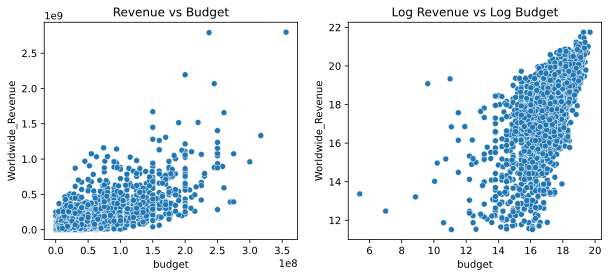

In [315]:
#Let us check at the relationship between Revenue and Budget

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.scatterplot(moviesNew['budget'], moviesNew['Worldwide_Revenue'])
plt.title('Revenue vs Budget');

#I will aslo check at the relationship using the log transformation to make the data look more normal
plt.subplot(1,2,2)
sns.scatterplot(np.log1p(moviesNew['budget']), np.log1p(moviesNew['Worldwide_Revenue']))
plt.title('Log Revenue vs Log Budget');

In [316]:
# Analysis of correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(moviesNew['budget'], moviesNew['Worldwide_Revenue'])
print('Pearsons correlation between budget and Worldwide Revenue: %.3f' % corr)

corr, _ = pearsonr(np.log1p(moviesNew['budget']), np.log1p(moviesNew['Worldwide_Revenue']))
print('Pearsons correlation between log transformed budget and log transformed revenue: %.3f' % corr)

#We can see there is a strong positive correlation between Budget and Worldwide Revenue

Pearsons correlation between budget and Worldwide Revenue: 0.717
Pearsons correlation between log transformed budget and log transformed revenue: 0.665


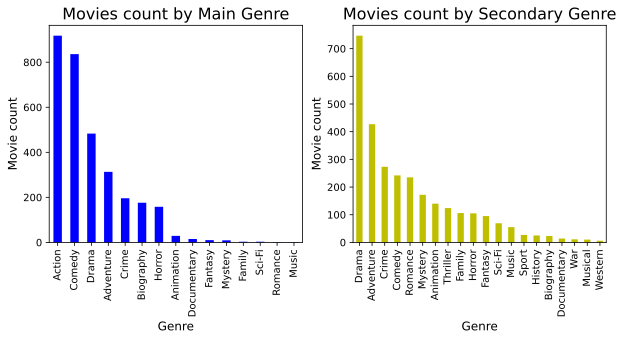

In [317]:
#Checking the movies count per Genre

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
moviesNew['genre_1'].value_counts().plot(kind='bar', color='b');
plt.title('Movies count by Main Genre', size=16)
plt.xlabel('Genre', size=12)
plt.ylabel('Movie count', size=12);

plt.subplot(1,2,2)
moviesNew['genre_2'].value_counts().plot(kind='bar', color='y');
plt.title('Movies count by Secondary Genre', size=16)
plt.xlabel('Genre', size=12)
plt.ylabel('Movie count', size=12);

# Top movies released was for Genre 'Action', 'Comedy', 'Drama', and 'Adventure

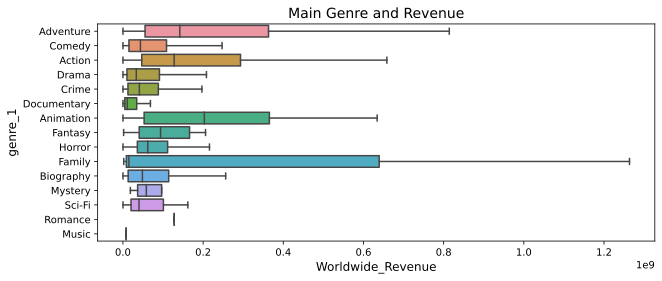

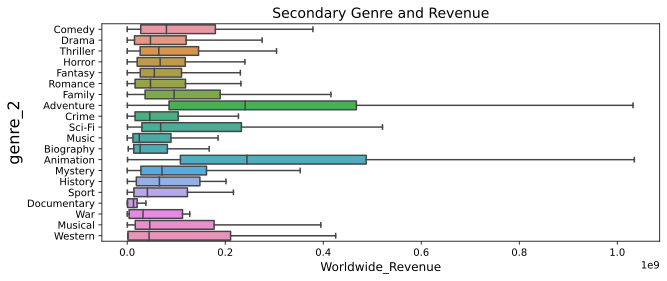

In [318]:
#Looking at the (Genre 1 and Genre 2) and Revenue

fig, ax = plt.subplots(figsize=(10, 4))
ax.tick_params(axis='both', labelsize=10)
plt.title('Main Genre and Revenue', fontsize=14)
plt.xlabel('Worldwide Revenue', fontsize=12)
plt.ylabel('Main Genre', fontsize=12)
sns.boxplot(ax=ax, x=moviesNew.Worldwide_Revenue, y=moviesNew.genre_1, showfliers=False, orient='h')
plt.show();

fig, ax = plt.subplots(figsize=(10, 4))
ax.tick_params(axis='both', labelsize=10)
plt.title('Secondary Genre and Revenue', fontsize=14)
plt.xlabel('Worldwide Revenue', fontsize=12)
plt.ylabel('Secondary Genre', fontsize=16)
sns.boxplot(ax=ax, x=moviesNew.Worldwide_Revenue, y=moviesNew.genre_2, showfliers=False, orient='h')
plt.show();

#Main genres 'Family, Adventure & Animation' generated the highest worldwide revenue
#Secondary genres 'Animation, Adventure & Sci-Fi' generated the highest worldwide revenue

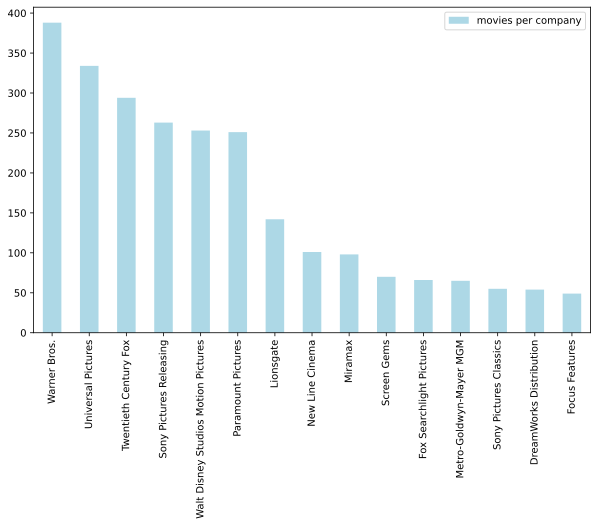

In [319]:
# Distributor Companies

distributorDict = {}
for elem in moviesNew["distributor"].values:
    #for dist in element:
    if elem not in distributorDict:
      distributorDict[elem] = 1
    else:
      distributorDict[elem] += 1

dist_df = pd.DataFrame.from_dict(distributorDict, orient='index', columns=["movies per company"])
dist_df.sort_values(by="movies per company", ascending=False).head(15).plot.bar(color='lightblue', figsize=(10,6))

dist_df.columns = ["num_of_movies"]

# 'Warner Bros.' has the highest number of movies produced.

In [320]:
# Analysis of Worlwide Revenue with Distributor

# Creating an index for Distributors
dist_df.index.values
for d in dist_df.index.values:
    moviesNew[d] = moviesNew['distributor'].apply(lambda x: 1 if d in x else 0)

# Average revenue per Distributor
for i, d in enumerate(dist_df.index.values):
    dist_df.loc[d, "avg_revenue"] = moviesNew[moviesNew[d]==1].Worldwide_Revenue.mean()

dist_df.sort_values(by=["num_of_movies", "avg_revenue"], ascending=False).head(10)

# Total revenue per Distributor
for i, d in enumerate(dist_df.index.values):
    dist_df.loc[d, "total_revenue"] = moviesNew[moviesNew[d]==1].Worldwide_Revenue.sum()

dist_df.sort_values(by=["num_of_movies", "total_revenue"], ascending=False).head(10)

,num_of_movies,avg_revenue,total_revenue
Warner Bros.,388,1.742665e+08,6.761542e+10
Universal Pictures,334,1.821510e+08,6.083843e+10
Twentieth Century Fox,294,2.036574e+08,5.987527e+10
Sony Pictures Releasing,263,1.799457e+08,4.732572e+10
Walt Disney Studios Motion Pictures,253,2.959322e+08,7.487085e+10
Paramount Pictures,251,1.578226e+08,3.961348e+10
Lionsgate,142,1.005945e+08,1.438501e+10
New Line Cinema,101,1.057787e+08,1.068365e+10
Miramax,98,5.373466e+07,5.265997e+09
Screen Gems,70,6.822087e+07,4.775461e+09


Text(0.5, 0, 'Distributor')

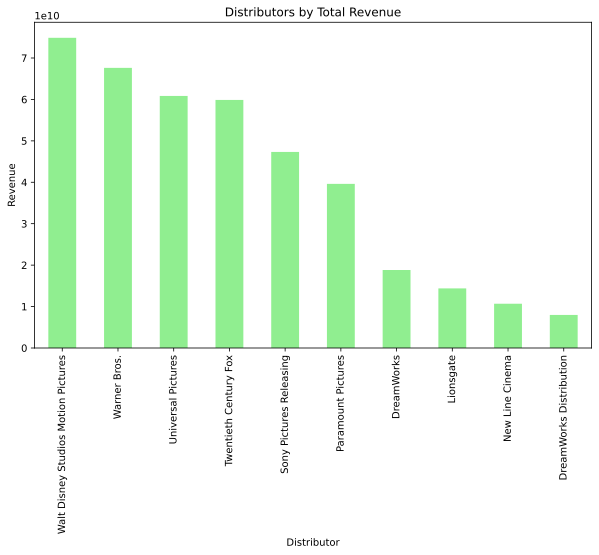

In [321]:
# Distributors by Total Revenue

dist_df.sort_values(by=["total_revenue"], ascending=False).total_revenue.head(10).plot.bar(color='lightgreen', figsize=(10,6))
plt.title("Distributors by Total Revenue")
plt.ylabel("Revenue")
plt.xlabel("Distributor")

#'Walt Disney Studios' has the highest total revenue earner

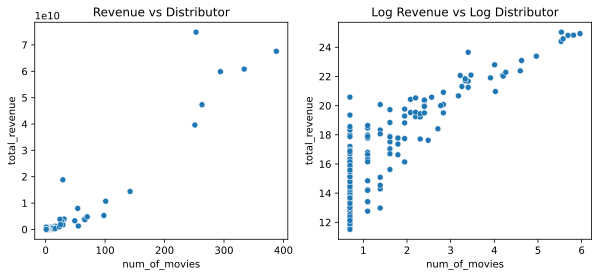

In [322]:
#Let us check at the relationship between Revenue and Distributor

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.scatterplot(dist_df['num_of_movies'], dist_df['total_revenue'])
plt.title('Revenue vs Distributor');

#I will aslo check at the relationship using the log transformation to make the data look more normal
plt.subplot(1,2,2)
sns.scatterplot(np.log1p(dist_df['num_of_movies']), np.log1p(dist_df['total_revenue']))
plt.title('Log Revenue vs Log Distributor');

In [323]:
# Analysis of correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(dist_df['num_of_movies'], dist_df['total_revenue'])
print('Pearsons correlation between Distributor and Worldwide Revenue: %.2f' % corr)

corr, _ = pearsonr(np.log1p(dist_df['num_of_movies']), np.log1p(dist_df['total_revenue']))
print('Pearsons correlation between log transformed distributor and log transformed revenue: %.2f' % corr)

#There is a strong positive correlation between Distributor and Worldwide Revenue

Pearsons correlation between Distributor and Worldwide Revenue: 0.96
Pearsons correlation between log transformed distributor and log transformed revenue: 0.86


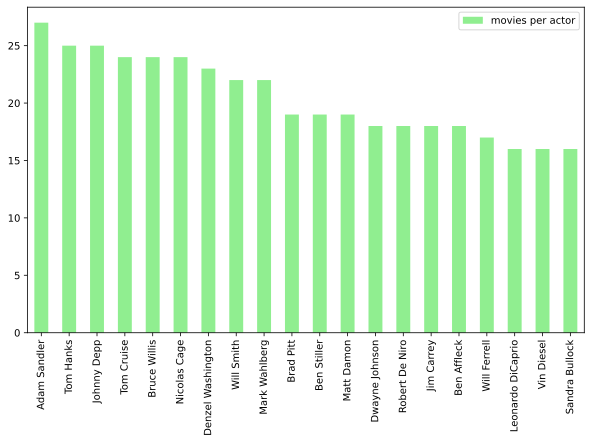

In [324]:
# Main Actor

actorDict = {}
for elem in moviesNew["main_actor_1"].values:
    #for dist in element:
    if elem not in actorDict:
      actorDict[elem] = 1
    else:
      actorDict[elem] += 1

actor_df = pd.DataFrame.from_dict(actorDict, orient='index', columns=["movies per actor"])
actor_df.sort_values(by="movies per actor", ascending=False).head(20).plot.bar(color='lightgreen', figsize=(10,6))

actor_df.columns = ["num_of_movies"]

# The most popular actor based on the number of titles is Adam Sandler

In [325]:
# Analysis of Worlwide Revenue with Main Actor

# Creating an index for Actors
actor_df.index.values
for d in actor_df.index.values:
    moviesNew[d] = moviesNew['main_actor_1'].apply(lambda x: 1 if d in x else 0)

# Average revenue per Actor
for i, d in enumerate(actor_df.index.values):
    actor_df.loc[d, "avg_revenue"] = moviesNew[moviesNew[d]==1].Worldwide_Revenue.mean()

actor_df.sort_values(by=["num_of_movies", "avg_revenue"], ascending=False).head(10)

# Total revenue per Actor
for i, d in enumerate(actor_df.index.values):
    actor_df.loc[d, "total_revenue"] = moviesNew[moviesNew[d]==1].Worldwide_Revenue.sum()

actor_df.sort_values(by=["num_of_movies", "total_revenue"], ascending=False).head(10)

,num_of_movies,avg_revenue,total_revenue
Adam Sandler,27,1.833724e+08,4.951055e+09
Tom Hanks,25,3.396758e+08,8.491896e+09
Johnny Depp,25,2.907546e+08,7.268864e+09
Tom Cruise,24,3.385520e+08,8.125249e+09
Bruce Willis,24,1.700206e+08,4.080496e+09
Nicolas Cage,24,1.307998e+08,3.139196e+09
Denzel Washington,23,1.357650e+08,3.122595e+09
Will Smith,22,3.606110e+08,7.933443e+09
Mark Wahlberg,22,1.927839e+08,4.241246e+09
Ben Stiller,19,2.343967e+08,4.453537e+09


In [326]:
# Checking the top 20 Main Actor by Total Revenue

top_20_actor = actor_df.sort_values(by=["total_revenue"], ascending=False).head(20)
fig = px.bar(top_20_actor, x=top_20_actor.index, y='total_revenue', title = 'Top 20 Actors by Movies Revenue', color = 'total_revenue', height=600, width=1000, 
             labels={'Worldwide_Revenue':'Global Revenue in USD Billion', 'x':''})
fig.show()

# The top Main Actor based on the total revenue earned is Robert Downey Jr. with a total of $9,206,893,682

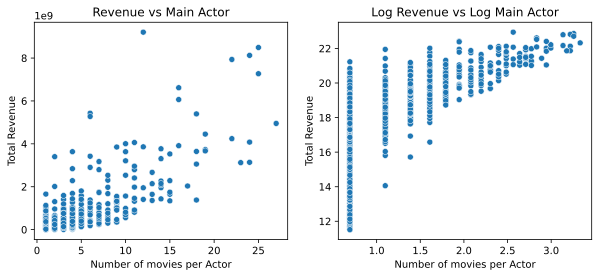

In [327]:
#Let us check the relationship between Revenue and Main Actor

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.scatterplot(actor_df['num_of_movies'], actor_df['total_revenue'])
plt.xlabel('Number of movies per Actor', size=10)
plt.ylabel('Total Revenue', size=10);
plt.title('Revenue vs Main Actor');

#I will aslo check at the relationship using the log transformation to make the data look more normal
plt.subplot(1,2,2)
sns.scatterplot(np.log1p(actor_df['num_of_movies']), np.log1p(actor_df['total_revenue']))
plt.xlabel('Number of movies per Actor', size=10)
plt.ylabel('Total Revenue', size=10);
plt.title('Log Revenue vs Log Main Actor');

In [328]:
#analysis of correlation and create log feature probably

corr, _ = pearsonr(actor_df['num_of_movies'], actor_df['total_revenue'])
print('Pearsons correlation between Main Actor and Worldwide Revenue: %.2f' % corr)

corr, _ = pearsonr(np.log1p(actor_df['num_of_movies']), np.log1p(actor_df['total_revenue']))
print('Pearsons correlation between log transformed Main Actor and log transformed revenue: %.2f' % corr)

# There is a strong correlation between Main Actor and Worldwide Revenue

Pearsons correlation between Main Actor and Worldwide Revenue: 0.81
Pearsons correlation between log transformed Main Actor and log transformed revenue: 0.65


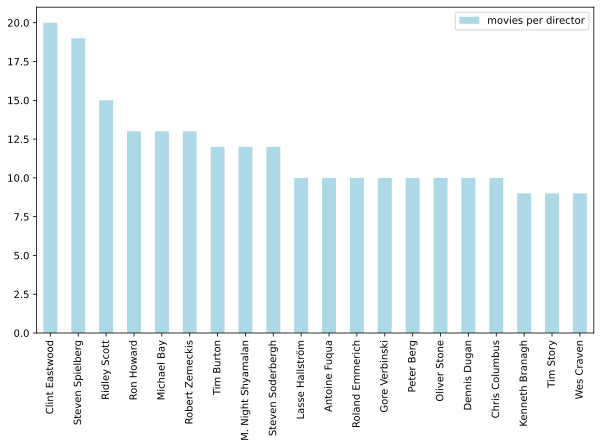

In [329]:
# Director

directorDict = {}
for elem in moviesNew["director"].values:
    #for dist in element:
    if elem not in directorDict:
      directorDict[elem] = 1
    else:
      directorDict[elem] += 1

director_df = pd.DataFrame.from_dict(directorDict, orient='index', columns=["movies per director"])
director_df.sort_values(by="movies per director", ascending=False).head(20).plot.bar(color='lightblue', figsize=(10,6))

director_df.columns = ["num_of_movies"]

# The most popular director based on the number of titles is Clint Eastwood

In [330]:
# Analysis of Worlwide Revenue with Director

# Creating an index for Directors
director_df.index.values
for d in director_df.index.values:
    moviesNew[d] = moviesNew['director'].apply(lambda x: 1 if d in x else 0)

# Average revenue per Director
for i, d in enumerate(director_df.index.values):
    director_df.loc[d, "avg_revenue"] = moviesNew[moviesNew[d]==1].Worldwide_Revenue.mean()

director_df.sort_values(by=["num_of_movies", "avg_revenue"], ascending=False).head(10)

# Total revenue per Director
for i, d in enumerate(director_df.index.values):
    director_df.loc[d, "total_revenue"] = moviesNew[moviesNew[d]==1].Worldwide_Revenue.sum()

director_df.sort_values(by=["num_of_movies", "total_revenue"], ascending=False).head(10)

,num_of_movies,avg_revenue,total_revenue
Clint Eastwood,20,1.360770e+08,2.721540e+09
Steven Spielberg,19,3.719823e+08,7.067664e+09
Ridley Scott,15,2.412803e+08,3.619204e+09
Michael Bay,13,4.962841e+08,6.451693e+09
Robert Zemeckis,13,2.427907e+08,3.156279e+09
Ron Howard,13,2.377258e+08,3.090435e+09
Tim Burton,12,2.995747e+08,3.594897e+09
M. Night Shyamalan,12,2.507975e+08,3.009570e+09
Steven Soderbergh,12,1.279796e+08,1.535756e+09
Roland Emmerich,10,3.761203e+08,3.761203e+09


In [331]:
# Checking the top 20 Director by Total Revenue

top_20_director = director_df.sort_values(by=["total_revenue"], ascending=False).head(20)
fig = px.bar(top_20_director, x=top_20_director.index, y='total_revenue', title = 'Top 20 Directors by Movies Revenue', color = 'total_revenue', height=600, width=1000, 
             labels={'Worldwide_Revenue':'Global Revenue in USD Billion', 'x':''})
fig.show()

# The top Director based on the total revenue earned is Steven Spiellberg with a total of $7,067,663,962

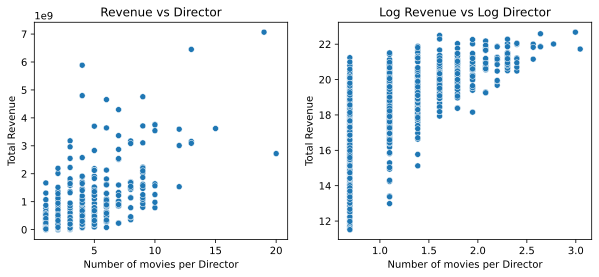

In [332]:
#Let us check at the relationship between Revenue and Director

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.scatterplot(director_df['num_of_movies'], director_df['total_revenue'])
plt.xlabel('Number of movies per Director', size=10)
plt.ylabel('Total Revenue', size=10);
plt.title('Revenue vs Director');

#I will aslo check at the relationship using the log transformation to make the data look more normal
plt.subplot(1,2,2)
sns.scatterplot(np.log1p(director_df['num_of_movies']), np.log1p(director_df['total_revenue']))
plt.xlabel('Number of movies per Director', size=10)
plt.ylabel('Total Revenue', size=10);
plt.title('Log Revenue vs Log Director');

In [333]:
# Analysis of correlation

corr, _ = pearsonr(director_df['num_of_movies'], director_df['total_revenue'])
print('Pearsons correlation between Director and Worldwide Revenue: %.2f' % corr)

corr, _ = pearsonr(np.log1p(director_df['num_of_movies']), np.log1p(director_df['total_revenue']))
print('Pearsons correlation between log transformed Director and log transformed revenue: %.2f' % corr)

#There is a strong positive correlation between Director and Worldwide Revenue

Pearsons correlation between Director and Worldwide Revenue: 0.73
Pearsons correlation between log transformed Director and log transformed revenue: 0.66


In [340]:
import plotly.io as pio

pio.write_html(fig, file='figure.html', auto_open=True)

In [336]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('BoxOffice_Rev_Prediction.ipynb')
